<a href="https://colab.research.google.com/github/rubincus/Test1/blob/master/SinCos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MH Seno-Coseno

### La iniciacion

In [ ]:
# Aquí vamos a construir una función de iniciación, estra puede ser reemplazada
# En este caso es una función trivial, donde definimos un upper bound y lower bound para cada dimensión.

import numpy as np

def init_solution(population, m_dimension, ub, lb, i):
  
  for j in range(m_dimension):
    population[i,j] = np.random.uniform(0, 1, 1) * (ub - lb) + lb
  return population

def init_list_solution(n_population, m_dimension, ub, lb):
  population = np.zeros((n_population, m_dimension))
  for i in range(n_population):
    population = init_solution(population, m_dimension, ub, lb, i)
  return population

In [ ]:
# Un ejemplo de como iniciamos la población. 
ub = 5
lb = -5
m_dimension = 10
n_population = 15
population = init_list_solution(n_population, m_dimension, ub, lb)
print (population)

### El update

In [ ]:
# SIN-COS
import random
def update_position(population, velocities, best, r1):  
  n, m = population.shape
  for i in range(n):
    for j in range(m):
      r2 = (2 * np.pi) * random.random()
      r3 = 2 * random.random()
      r4 = random.random()

      if r4 < 0.5:
        population[i,j] = population[i,j] + (r1 * np.sin(r2) * abs(r3 * best[j] - population[i, j])) # Actualización respecto del original. 
        velocities[i,j] = r1 * np.sin(r2) * abs(r3 * best[j] - population[i, j])
      else:
        population[i,j] = population[i, j] + (r1 * np.cos(r2) * abs(r3 * best[j] - population[i, j]))        
        velocities[i,j] = r1 * np.cos(r2) * abs(r3 * best[j] - population[i, j])                              
  return population, velocities

In [ ]:
# JAYA

import random
def update_position(population, velocities, best, r1):  
    n, m = population.shape
    for i in range(n):
        for j in range(m):
            r1 = random.random()
            r2 = random.random()
            population[i,j] = population[i,j] + r1*(best[j] - abs(population[i, j])) - r2*(worst[j] - abs(population[i, j])) 
            velocities[i,j] = r1*(best[j] - abs(population[i, j])) - r2*(worst[j] - abs(population[i, j])) 
    return population, velocities

### Obteniendo el mejor valor

Para el caso de un mínimo.



In [ ]:
def get_fitness(population, fitness):
  # Vamos a asumir que entregamos la población entera y calculamos el fitness para todos
  n, m = population.shape
  for i in range(n):
    sum = 0
    for j in range(m):
      # La norma del vector.
      sum += population[i,j]**2
    fitness[i] = sum
  return fitness

def get_new_best(population, best, best_fitness):
  n, m = population.shape
  for i in range(n):
    if fitness[i] < best_fitness:
      best = population[i]
      best_fitness = fitness[i]
  return best, best_fitness


In [ ]:
# Pongamos todo a funcionar

import copy
ub = 5
lb = -5
m_dimension = 10
n_population = 15
fitness = np.full(n_population, 10000.0)
best = np.full(m_dimension, 300.0)
best_fitness = 13455
max_iter = 300
# Iniciamos las soluciones
population = init_list_solution(n_population, m_dimension, ub, lb)
velocidades = []
velocities = np.zeros((n_population, m_dimension))

for k in range(max_iter):
  # Obtenemos el fitness
  fitness = get_fitness(population, fitness)
  # Obtenemos el best
  best, best_fitness = get_new_best(population, best, best_fitness)
  # Iteramos con la MH
  r1 = 2 - k * ((2) / max_iter)  # Va decreciendo linealmente.
  population, velocities = update_position(population, velocities, best, r1)
  velocidades.append(copy.deepcopy(velocities))



In [ ]:
print(best)

[ 8.03201222e-13  4.95392164e-14  7.99768977e-12  9.95015849e-13
  5.65968791e-13 -7.47896375e-13 -8.62413401e-12 -2.20653450e-12
 -1.07200424e-12 -3.26099573e-12]


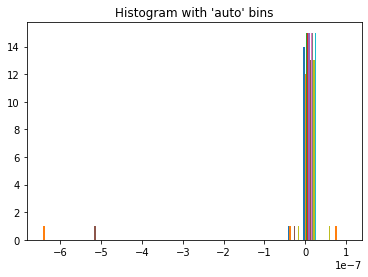

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
_ = plt.hist(velocidades[250], bins=20)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

### Procedimiento de binzarización

Vamos a escribir distintos procedimientos de binarización. Para los distintos vectores. 



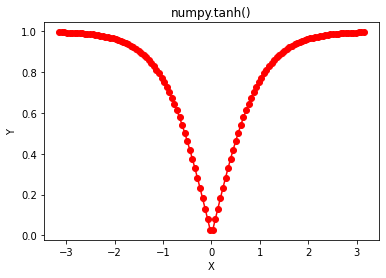

In [ ]:

# Python program showing Graphical 
# representation of tanh() function 
import numpy as np 
import matplotlib.pyplot as plt 
  
in_array = np.linspace(-np.pi, np.pi, 120) 
out_array = abs(np.tanh(in_array) )
  
#print("in_array : ", in_array) 
#print("\nout_array : ", out_array) 
  
# red for numpy.tanh() 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 